# Trabajo Final: Análisis y Resúmenes Automáticos de Noticias usando GPT y Técnicas de Prompting

**Autor:** Ariel Agüero  
**Nombre del curso:** Inteligencia Artificial: Generación de Prompts  
**Comisión:** 67115  
**Nombre del proyecto:** Análisis y Resúmenes Automáticos de Noticias usando GPT y Técnicas de Prompting  

---

## Resumen
 
Este proyecto tiene como objetivo desarrollar un sistema que, a partir de noticias, pueda realizar resúmenes automáticos, clasificar sentimientos y generar análisis iterativos mediante técnicas avanzadas de prompting. El enfoque integra modelos GPT y herramientas específicas para la recuperación de información y análisis contextual.


Indice 

1. Introducción
2. Objetivos
3. Metodología
4. Herramientas y tecnología
5. Implementación
6. Resultados
7. Conclusiones
8. Referencias

1. Introducción

2. Objetivos

Crear un sistema que permita:

- **2.1** Resumir automáticamente artículos de las noticias relacionadas al tema que elegio el usuario de las ultimas 72 horas.  
- **2.2** Clasificar el sentimiento del contenido.
- **2.3** Generar etiquetas relevantes para cada noticia.
- **2.4** Genera una tabla con pandas en donde indique el titulo,fecha de publicación, hora de publicasción y cantidad de carácteres de cada noticia 
- **2.5** Generar un grafo para tener un resumen visual.
- **2.6** Hacer preguntas iterativas para profundizar en el análisis de una noticia.


3. Metodología

- **3.1** One-shot prompting para la generación de resúmenes.
- **3.2** Few-shot prompting para clasificar sentimientos con ejemplos previos.
- **3.3** Prompt iterativo para afinar las consultas.
- **3.4** Pandas para analisis de datos
- **3.5** Gráficos de conocimiento para representaciónes visuales  
- **3.6** Función calling para interactuar con funciones predefinidas (como extraer nombres de personas, lugares o fechas).


4. Herramientas y tecnología

- **4.1** Python
- **4.2** OpenAI
- **4.3** NewsAPI
- **4.4** Pandas

5. Implementación

5.1 Import openAI dependences (load with conda install openai)

In [42]:
#Imports 
import requests
import openai
from datetime import datetime, timedelta


5.2 Use the API Key

In [46]:
NEWS_API_KEY = ""
openai.api_key = ""

5.3 Obtención de las noticias

In [47]:
# Función para obtener noticias populares de Argentina
def obtener_noticias_argentina_populares(tema, numero_resultados=5):
    # Rango de los últimos 3 días
    fecha_hoy = datetime.now()
    fecha_inicio = (fecha_hoy - timedelta(days=3)).strftime('%Y-%m-%d')
    fecha_fin = fecha_hoy.strftime('%Y-%m-%d')
    
    # Endpoint de NewsAPI
    url = (
        f"https://newsapi.org/v2/everything?"
        f"q={tema} AND Argentina&"
        f"language=es&"
        f"from={fecha_inicio}&to={fecha_fin}&"
        f"sortBy=popularity&"
        f"pageSize={numero_resultados}&"
        f"apiKey={NEWS_API_KEY}"
    )
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articulos = data.get("articles", [])
        return [(art["title"], art["description"], art["url"], art["publishedAt"]) for art in articulos]
    else:
        print(f"Error al obtener noticias: {response.status_code}")
        return []

# Función para procesar noticias con OpenAI
def procesar_noticias(articulos):
    resultados = []
    for titulo, descripcion, url, fecha in articulos:
        # Prompt para generar un resumen en español
        prompt_resumen = f"""
        Título: {titulo}
        Descripción: {descripcion}

        Por favor, genera un resumen conciso en español del contenido del artículo.
        """
        response_resumen = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt_resumen}],
            max_tokens=100
        )
        resumen = response_resumen.choices[0]['message']['content']
        
        # Prompt para clasificar el sentimiento en español
        prompt_sentimiento = f"""
        Título: {titulo}
        Resumen: {resumen}

        Clasifica el sentimiento del artículo como Positivo, Negativo o Neutral. Responde en español.
        """
        response_sentimiento = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt_sentimiento}],
            max_tokens=50
        )
        sentimiento = response_sentimiento.choices[0]['message']['content'].strip()
        
        resultados.append((titulo, resumen, sentimiento, url, fecha))
    return resultados

# Main: Integra búsqueda de noticias con procesamiento
if __name__ == "__main__":
    tema = input("Introduce el tema de interés de Argentina: ")
    
    # Obtener noticias populares de Argentina en español
    noticias = obtener_noticias_argentina_populares(tema)
    if not noticias:
        print("No se encontraron noticias.")
    else:
        print("\nNoticias encontradas:")
        for idx, (titulo, _, url, fecha) in enumerate(noticias, 1):
            print(f"{idx}. {titulo} ({fecha}) ({url})")
        
        # Procesar noticias
        print("\nProcesando noticias con OpenAI...")
        resultados = procesar_noticias(noticias)
        
        # Mostrar resultados
        print("\nResultados:")
        for idx, (titulo, resumen, sentimiento, url, fecha) in enumerate(resultados, 1):
            print(f"{idx}. {titulo}")
            print(f"   Resumen: {resumen}")
            print(f"   Sentimiento: {sentimiento}")
            print(f"   Fecha de publicación: {fecha}")
            print(f"   URL: {url}")


Introduce el tema de interés de Argentina:  historia



Noticias encontradas:
1. Este era el día a día en la corte del Generalísimo: entre el Palacio de El Pardo y el Pazo de Meirás (2024-12-17T16:00:00Z) (http://www.muyinteresante.com/historia/este-era-el-dia-a-dia-en-la-corte-del-generalisimo-entre-el-palacio-de-el-pardo-y-el-pazo-de-meiras.html)
2. Ángel Di María y su verdad tras 20 años de fútbol: "Somos el hijo de pu** que se lesiona, que no quiere jugar finales" (2024-12-18T07:05:08Z) (https://www.marca.com/futbol/liga-portuguesa/2024/12/18/angel-di-maria-verdad-20-anos-futbol-hijo-pu-lesiona-quiere-jugar-finales.html)
3. Atlético, 11 razones para creer... y creer (2024-12-16T19:59:17Z) (https://www.marca.com/futbol/atletico/2024/12/16/atletico-11-razones-creer-creer.html)
4. Coello ante su gran reto (2024-12-17T16:00:33Z) (https://www.marca.com/padel/2024/12/17/coello-gran-reto.html)
5. Ancelotti ganador del Premio The Best al Mejor Entrenador de la FIFA 2024 (2024-12-17T17:52:01Z) (https://www.marca.com/futbol/premios-the-best/2024

5.4 Visualización del titulo, fecha de publicación, hora de publicación y cantidad de carácteres

In [48]:
from datetime import datetime, timedelta
import pandas as pd

# Convertir resultados a DataFrame
def resultados_a_dataframe(resultados):
    df = pd.DataFrame(resultados, columns=["Título", "Resumen", "Sentimiento", "URL", "Fecha"])
    return df

# Análisis con formato personalizado
def analizar_noticias(df):
    # Convertir la columna "Fecha" a datetime
    df["Fecha"] = pd.to_datetime(df["Fecha"])

    # Asegurarnos de que las fechas sean comparables
    now = datetime.now().astimezone()
    noticias_recientes = df[df["Fecha"] > (now - timedelta(days=3))].copy()

    # Separar fecha y hora de publicación
    noticias_recientes["fecha_publicacion"] = noticias_recientes["Fecha"].dt.date
    noticias_recientes["hora_publicacion"] = noticias_recientes["Fecha"].dt.strftime("%H:%M")

    # Calcular la cantidad de caracteres en cada noticia (título + resumen)
    noticias_recientes["cantidad_caracteres"] = (
        noticias_recientes["Título"].str.len() + noticias_recientes["Resumen"].str.len()
    )

    # Seleccionar y reordenar las columnas
    noticias_recientes = noticias_recientes[
        ["Título", "fecha_publicacion", "hora_publicacion", "cantidad_caracteres"]
    ]

    print("\nNoticias publicadas en las últimas 72 horas:")
    if not noticias_recientes.empty:
        print(noticias_recientes)
    else:
        print("No hay noticias publicadas en las últimas 72 horas.")

# Crear DataFrame y analizar
df_resultados = resultados_a_dataframe(resultados)
analizar_noticias(df_resultados)



Noticias publicadas en las últimas 72 horas:
                                              Título fecha_publicacion  \
0  Este era el día a día en la corte del Generalí...        2024-12-17   
1  Ángel Di María y su verdad tras 20 años de fút...        2024-12-18   
2         Atlético, 11 razones para creer... y creer        2024-12-16   
3                           Coello ante su gran reto        2024-12-17   
4  Ancelotti ganador del Premio The Best al Mejor...        2024-12-17   

  hora_publicacion  cantidad_caracteres  
0            16:00                  354  
1            07:05                  526  
2            19:59                  222  
3            16:00                  193  
4            17:52                  260  


5.5 Generar etiquetas para cada noticia

In [49]:
import pandas as pd

# Función para generar una etiqueta relevante usando GPT
def generar_etiquetas(resultados):
    etiquetas_resultados = []
    for titulo, resumen, _, _, _ in resultados:
        prompt_etiqueta = f"""
        Título: {titulo}
        Resumen: {resumen}

        Por favor, genera una única etiqueta relevante para esta noticia en español.
        """
        response_etiqueta = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt_etiqueta}],
            max_tokens=20  # Reducido para una sola etiqueta
        )
        etiqueta = response_etiqueta.choices[0]['message']['content'].strip()
        etiquetas_resultados.append({"Título": titulo, "Etiqueta": etiqueta})
    return etiquetas_resultados

# Generar etiquetas
etiquetas_resultados = generar_etiquetas(resultados)

# Convertir a DataFrame para una salida tabular
df_etiquetas = pd.DataFrame(etiquetas_resultados)

# Mostrar el DataFrame
print("\nEtiquetas generadas para las noticias:")
print(df_etiquetas)



Etiquetas generadas para las noticias:
                                              Título  \
0  Este era el día a día en la corte del Generalí...   
1  Ángel Di María y su verdad tras 20 años de fút...   
2         Atlético, 11 razones para creer... y creer   
3                           Coello ante su gran reto   
4  Ancelotti ganador del Premio The Best al Mejor...   

                        Etiqueta  
0            DictaduraFranquista  
1                       Deportes  
2                #AtléticoMadrid  
3                 #CoelloMaestro  
4  #AncelottiMejorEntrenadorFIFA  


5.6 Generación del grafo 

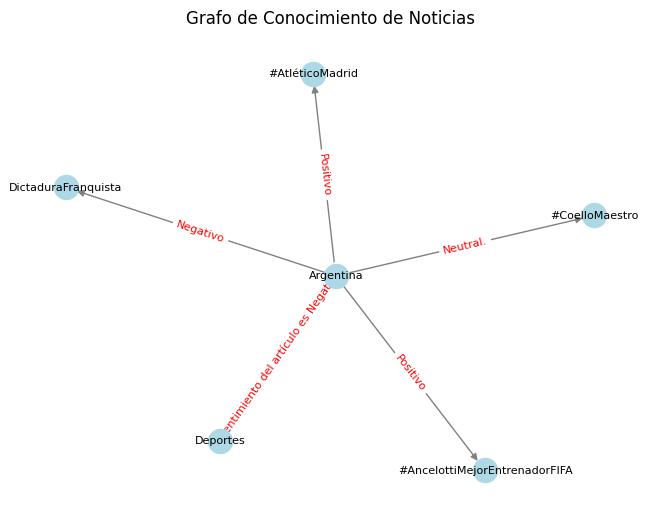

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Función para crear grafo de conocimiento
def crear_grafo_conocimiento(resultados, df_etiquetas):
    G = nx.DiGraph()

    # Nodo central
    G.add_node("Argentina", etiqueta="Argentina")

    # Verificar la longitud de las listas
    if len(resultados) != len(df_etiquetas):
        print(f"Advertencia: Los datos no coinciden en longitud. Noticias: {len(resultados)}, Etiquetas: {len(df_etiquetas)}")
        # Asegurarse de que las etiquetas y resultados coincidan en tamaño
        min_len = min(len(resultados), len(df_etiquetas))
        resultados = resultados[:min_len]
        df_etiquetas = df_etiquetas[:min_len]

    # Crear nodos y relaciones
    for (titulo, resumen, sentimiento, _, _), etiqueta in zip(resultados, df_etiquetas["Etiqueta"]):
        # Nodos principales con etiquetas generadas
        G.add_node(titulo, etiqueta=etiqueta)

        # Agregar relaciones con el sentimiento como etiqueta
        G.add_edge("Argentina", titulo, relacion=sentimiento)

    return G

# Visualizar el grafo con etiquetas pequeñas
def visualizar_grafo(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'etiqueta')  # Usar las etiquetas personalizadas
    edge_labels = nx.get_edge_attributes(G, 'relacion')  # Obtener etiquetas de las relaciones

    # Dibujar nodos y aristas
    nx.draw(
        G, pos, with_labels=True, labels=labels, 
        node_color="lightblue", edge_color="gray", 
        font_size=8  # Tamaño reducido de etiquetas
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=8)
    plt.title("Grafo de Conocimiento de Noticias")
    plt.show()

# Asegúrate de que `resultados` y `df_etiquetas` tengan los datos reales antes de ejecutar
grafo = crear_grafo_conocimiento(resultados, df_etiquetas)
visualizar_grafo(grafo)


5.7 Preguntas iterativas 

In [9]:
# Función para hacer preguntas iterativas sobre una noticia
def preguntas_iterativas(resultados):
    print("\nExploración iterativa de noticias:")
    for idx, (titulo, resumen, _, _, _) in enumerate(resultados, 1):salirs
        print(f"{idx}. {titulo}")

    # Seleccionar una noticia
    seleccion = int(input("\nSelecciona el número de la noticia que quieres analizar: "))
    titulo, resumen, _, _, _ = resultados[seleccion - 1]

    print(f"\nNoticia seleccionada:\nTítulo: {titulo}\nResumen: {resumen}")

    while True:
        pregunta = input("\nEscribe una pregunta sobre esta noticia (o 'salir' para terminar): ")
        if pregunta.lower() == "salir":
            print("Análisis iterativo finalizado.")
            break

        prompt_pregunta = f"""
        Título: {titulo}
        Resumen: {resumen}

        Pregunta: {pregunta}

        Por favor, responde la pregunta basada en el contenido de la noticia.
        """
        response_pregunta = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt_pregunta}],
            max_tokens=150
        )
        respuesta = response_pregunta.choices[0]['message']['content'].strip()
        print(f"\nRespuesta: {respuesta}")

# Iniciar preguntas iterativas
preguntas_iterativas(resultados)


Exploración iterativa de noticias:
1. Este era el día a día en la corte del Generalísimo: entre el Palacio de El Pardo y el Pazo de Meirás
2. Ancelotti ganador del Premio The Best al Mejor Entrenador de la FIFA 2024
3. El Interclubes de Primera División de la AAT: de la mano de la familia Cerúndolo, el Club Belgrano se consagró campeón
4. La continuidad del boxeo como deporte Olímpico pasa por Lima
5. Adeslas, el corazón del pádel



Selecciona el número de la noticia que quieres analizar:  2



Noticia seleccionada:
Título: Ancelotti ganador del Premio The Best al Mejor Entrenador de la FIFA 2024
Resumen: Ancelotti ha sido galardonado con el Premio The Best al Mejor Entrenador de la FIFA 2024 por sus logros con el Real Madrid, incluyendo la Liga, la Champions y la Supercopa de España.



Escribe una pregunta sobre esta noticia (o 'salir' para terminar):  ¿quien es acelotti?



Respuesta: Ancelotti es un famoso entrenador de fútbol que ha sido galardonado con el Premio The Best al Mejor Entrenador de la FIFA 2024 por sus logros con el Real Madrid. Ha logrado importantes títulos como la Liga, la Champions y la Supercopa de España.



Escribe una pregunta sobre esta noticia (o 'salir' para terminar):  cuantos años tiene 



Respuesta: En el contenido de la noticia no se menciona la edad de Ancelotti.



Escribe una pregunta sobre esta noticia (o 'salir' para terminar):  tiene pareja 



Respuesta: Lo siento, pero la noticia no proporciona información sobre la vida personal de Ancelotti, como si tiene pareja o no. La noticia se centra en su logro como entrenador y en los títulos que ha conseguido con el Real Madrid.



Escribe una pregunta sobre esta noticia (o 'salir' para terminar):  cuantos titulos gano acenlotti en el real madrid 



Respuesta: Ancelotti ganó la Liga, la Champions y la Supercopa de España con el Real Madrid, por lo tanto, ganó un total de 3 títulos durante su tiempo como entrenador en el club.



Escribe una pregunta sobre esta noticia (o 'salir' para terminar):  Real madrid es de espana



Respuesta: Sí, según la noticia, el Real Madrid es de España, ya que se menciona que Ancelotti ha sido galardonado por sus logros con el Real Madrid, incluyendo la Liga, la Champions y la Supercopa de España.



Escribe una pregunta sobre esta noticia (o 'salir' para terminar):  salir


Análisis iterativo finalizado.


## 6. Resultados

Cada resultado ahora contiene:

- **Titulo,resumen, clasificación de sentimiento de las noticias relacioandas a lo que elegió el usuario de las ultimoas 72 horas**
- **Titulo, fecha de publicación, hora de publicación y cantidad de caracteres de cada noticia**
- **Generación de etiquetas para cada noticia**
- **Grafo de conocimiento**
- **Preguntas y respuestas iterativas**